# FLOWER CLASSIFICATION PROJECT

#### OBJECTIVE: Determine the species of flowers based on petal and sepal dimensions.

In [3]:
## Import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [4]:
###load iris dataset
irisdf = sn.load_dataset('iris')

In [5]:
##view first 20 rows

irisdf.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [38]:
##View last 20 rows

irisdf.tail(20)

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
132,6.4,2.8,5.6,2.2,virginica
133,6.3,2.8,5.1,1.5,virginica
134,6.1,2.6,5.6,1.4,virginica
135,7.7,3.0,6.1,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
139,6.9,3.1,5.4,2.1,virginica


In [5]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
irisdf.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
##labeling setosa, versicolor, and virginica species with 0, 1 and 2
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
irisdf.species = label_encoder.fit_transform(irisdf.species)
print(irisdf)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [8]:
irisdf.species.value_counts(0)

0    50
1    50
2    50
Name: species, dtype: int64

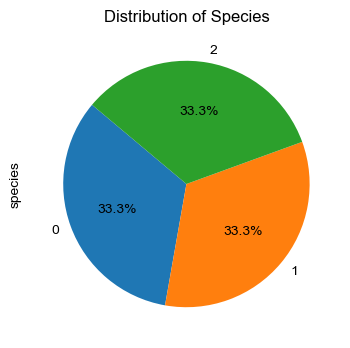

In [9]:
##Distribution of Species
import matplotlib.pyplot as plt

value_counts = pd.value_counts(irisdf.species)
plt.figure(figsize=(4, 4))  
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Species')

sn.set_style("white")
plt.ylabel('species')

plt.show()


In [10]:
##Determine the means for each attribute for each species

mean_by_species = irisdf.groupby('species').mean()

print(mean_by_species)

         sepal_length  sepal_width  petal_length  petal_width
species                                                      
0               5.006        3.428         1.462        0.246
1               5.936        2.770         4.260        1.326
2               6.588        2.974         5.552        2.026


<Figure size 800x600 with 0 Axes>

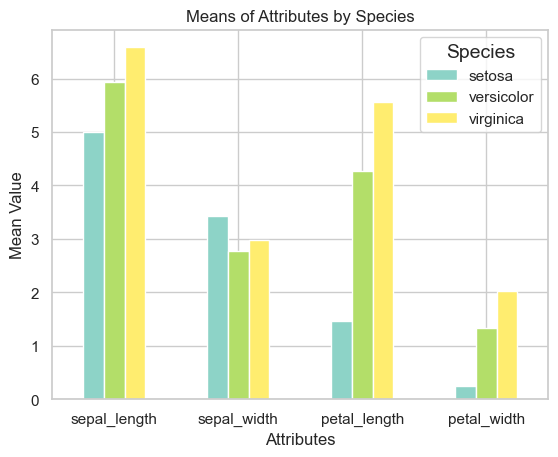

In [20]:
# Plotting of means of attributres uing group bar chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for the means of attributes by species
irisdf_means = pd.DataFrame({
    'sepal_length': [5.006, 5.936, 6.588],
    'sepal_width': [3.428, 2.770, 2.974],
    'petal_length': [1.462, 4.260, 5.552],
    'petal_width': [0.246, 1.326, 2.026]
}, index=['setosa', 'versicolor', 'virginica'])

# Transpose the DataFrame for easier plotting
irisdf_means = irisdf_means.T

# Create a grouped bar chart using Matplotlib
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot the grouped bar chart
irisdf_means.plot(kind='bar', colormap='Set3', rot=0)
plt.xlabel("Attributes")
plt.ylabel("Mean Value")
plt.title("Means of Attributes by Species")
plt.legend(title="Species", title_fontsize="14")

plt.show()

   

# MODEL BUILDING

In [44]:
# Model building using Logistic regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
irisdf = sn.load_dataset('iris')

# Separating the attributes (X) and target species (Y)
X = irisdf[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = irisdf['species']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# StandardScaler Creation and Training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model Creating and Training
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train, Y_train)

# Logistic Regression Prediction Model
Y_pred = logistic_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred, target_names=irisdf['species'].unique())
cm = confusion_matrix(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(report)
print(f'Confusion Matrix:\n{cm}')


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


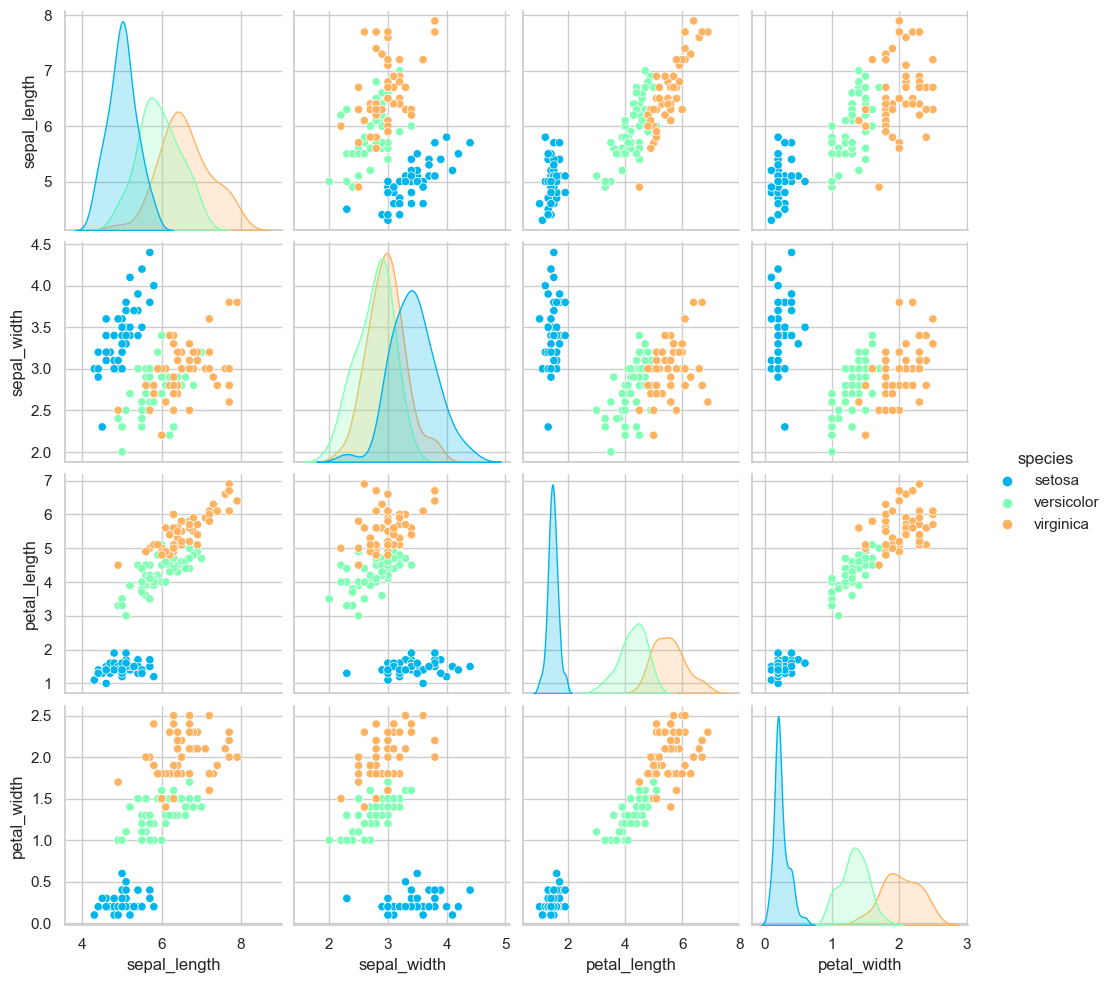

In [89]:
sn.pairplot(irisdf, hue='species', palette = 'rainbow')

In [47]:
# Model building using K-Nearest Neighbor (KNN)

irisdf = sn.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

irisdf = load_iris()
X = irisdf.data  
y = irisdf.target  

# K-Nearest Neighbors Model Creation and Training
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# KNN prediction model
y_pred = knn_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=irisdf.target_names)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)
print(f'Confusion Matrix:\n{cm}')


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
##Model building using Random Forest
irisdf = sn.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

irisdf = load_iris()
X = irisdf.data
y = irisdf.target

# Random Forest model creation and training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest Prediction Model
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)
print(f'Confusion Matrix:\n{cm}')



Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
